In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data to include the channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


11490434/11490434 [==============================] - 2s 0us/step


In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 output classes for 10 digits
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [3]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/10
1500/1500 [==============================] - 12s 5ms/step - loss: 0.1611 - accuracy: 0.9498 - val_loss: 0.0512 - val_accuracy: 0.9844
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0498 - accuracy: 0.9839 - val_loss: 0.0526 - val_accuracy: 0.9833
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0344 - accuracy: 0.9893 - val_loss: 0.0414 - val_accuracy: 0.9879
Epoch 4/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0280 - accuracy: 0.9913 - val_loss: 0.0485 - val_accuracy: 0.9862
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0209 - accuracy: 0.9931 - val_loss: 0.0354 - val_accuracy: 0.9895
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0179 - accuracy: 0.9944 - val_loss: 0.0450 - val_accuracy: 0.9875
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0148 - accuracy: 0.9956 - val_loss: 0.0401 - val_accuracy

In [4]:
# Save the trained model
model.save('mnist_model.keras')


In [8]:
loaded_model = tf.keras.models.load_model('mnist_model.keras')

In [9]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

1/1 [==============================] - 0s 252ms/step


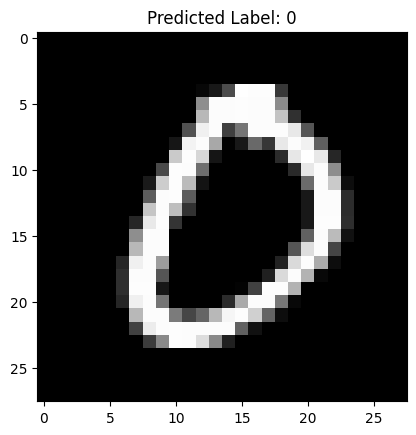

Actual Label: 0


In [10]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset (again for demonstration purposes, typically you would use new data)
(_, _), (x_test, y_test) = mnist.load_data()

# Normalize the images to the range [0, 1]
x_test = x_test / 255.0

# Reshape the data to include the channel dimension
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Select a random sample from the test set
random_index = np.random.randint(0, len(x_test))
sample_image = x_test[random_index]
sample_label = y_test[random_index]

# Add batch dimension to the sample image
sample_image_batch = np.expand_dims(sample_image, axis=0)

# Make a prediction
predicted_probabilities = loaded_model.predict(sample_image_batch)
predicted_label = np.argmax(predicted_probabilities)

# Display the image and the predicted label
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f'Predicted Label: {predicted_label}')
plt.show()

# Print the actual label
actual_label = np.argmax(sample_label)
print(f'Actual Label: {actual_label}')


In [4]:
import tensorflow as tf
import numpy as np

# Generate synthetic data
np.random.seed(0)
num_samples = 1000
a_values = np.random.uniform(-2*np.pi, 2*np.pi, num_samples)  # random values for 'a'
b_values = np.random.uniform(-1.5, 1.5, num_samples)  # random values for 'b'

# Calculate target values with noise
targets = np.sin(a_values) + np.tan(b_values)
targets_with_noise = targets + np.random.normal(0, 0.1, num_samples)  # adding Gaussian noise

# Create X and y arrays
X = np.column_stack((a_values, b_values))  # Features: a_values and b_values concatenated horizontally
y = targets_with_noise  # Target values with added noise

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # No activation for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=50, batch_size=32, shuffle=True)

# Test the model with new data
test_a = np.array([0.5, 1.0, 1.5])
test_b = np.array([0.2, 0.4, 0.6])
test_data = np.column_stack((test_a, test_b))
predictions = model.predict(test_data)

# Print predictions
for i in range(len(test_a)):
    print(f"For a={test_a[i]}, b={test_b[i]}, predicted value: {predictions[i][0]}")


Epoch 1/50
32/32 [==============================] - 2s 4ms/step - loss: 10.7322
Epoch 2/50
32/32 [==============================] - 0s 3ms/step - loss: 9.3055
Epoch 3/50
32/32 [==============================] - 0s 3ms/step - loss: 8.4023
Epoch 4/50
32/32 [==============================] - 0s 3ms/step - loss: 7.0968
Epoch 5/50
32/32 [==============================] - 0s 3ms/step - loss: 5.8095
Epoch 6/50
32/32 [==============================] - 0s 3ms/step - loss: 4.7415
Epoch 7/50
32/32 [==============================] - 0s 3ms/step - loss: 4.0558
Epoch 8/50
32/32 [==============================] - 0s 3ms/step - loss: 3.7666
Epoch 9/50
32/32 [==============================] - 0s 3ms/step - loss: 3.5991
Epoch 10/50
32/32 [==============================] - 0s 3ms/step - loss: 3.4890
Epoch 11/50
32/32 [==============================] - 0s 3ms/step - loss: 3.4078
Epoch 12/50
32/32 [==============================] - 0s 3ms/step - loss: 3.3382
Epoch 13/50
32/32 [=============================